In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

In [25]:
df = pd.read_csv('state_data.csv')
df.columns

Index(['State', 'Sector', 'Year', 'Employment (2012=100)',
       'Employment (percent change)', 'Hourly labor compensation (2012=100)',
       'Hourly labor compensation (percent change)',
       'Hourly labor compensation cost ($/hour)',
       'Hourly labor compensation cost (percent change)', 'Hours (2012=100)',
       'Hours (percent change)', 'Implicit output deflator (2012=100)',
       'Implicit output deflator (percent change)',
       'Labor compensation (2012=100)', 'Labor compensation (percent change)',
       'Labor compensation cost (million $)',
       'Labor compensation cost (percent change)',
       'Labor productivity (2012=100)', 'Labor productivity (percent change)',
       'Number of employees (percent change)',
       'Number of employees (thousands)', 'Number of hours (millions)',
       'Number of hours (percent change)', 'Output (2012=100)',
       'Output (percent change)', 'Output per employee (2012=100)',
       'Output per employee (percent change)',
     

In [26]:
df.head()

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
0,Alabama,Private Nonfarm,2007,109.312,NaN,88.207,NaN,25.104,NaN,111.179,...,31.919,NaN,109.487,NaN,100544.415,NaN,97.717,NaN,131017.921,NaN
1,Alabama,Private Nonfarm,2008,105.771,-3.2,92.369,4.7,26.289,4.7,105.856,...,32.176,0.8,105.084,-4.0,96501.227,-4.0,98.359,0.7,132265.709,1.0
2,Alabama,Private Nonfarm,2009,99.487,-5.9,97.805,5.9,27.836,5.9,95.843,...,34.219,6.3,101.187,-3.7,92922.613,-3.7,100.466,2.1,125856.079,-4.8
3,Alabama,Private Nonfarm,2010,99.046,-0.4,99.169,1.4,28.224,1.4,96.281,...,33.961,-0.8,100.882,-0.3,92642.114,-0.3,99.045,-1.4,131441.376,4.4
4,Alabama,Private Nonfarm,2011,98.814,-0.2,101.158,2.0,28.790,2.0,96.638,...,33.666,-0.9,100.377,-0.5,92178.639,-0.5,99.136,0.1,137342.683,4.5


In [27]:
year_list = [2015, 2016, 2017, 2018, 2019]

clean_data = df[df['Year'].isin(year_list)]
clean_data.head(10)

,State,Sector,Year,Employment (2012=100),Employment (percent change),Hourly labor compensation (2012=100),Hourly labor compensation (percent change),Hourly labor compensation cost ($/hour),Hourly labor compensation cost (percent change),Hours (2012=100),...,Real hourly labor compensation cost ($/hour),Real hourly labor compensation cost (percent change),Real labor compensation (2012=100),Real labor compensation (percent change),Real labor compensation cost (million $),Real labor compensation cost (percent change),Unit labor cost (2012=100),Unit labor cost (percent change),Value of production (million $),Value of production (percent change)
8,Alabama,Private Nonfarm,2015,103.404,1.3,108.430,2.6,30.860,2.6,102.281,...,34.508,2.8,108.895,4.5,100000.706,4.5,108.703,3.0,153074.368,3.2
9,Alabama,Private Nonfarm,2016,105.502,2.0,109.119,0.6,31.056,0.6,104.656,...,34.599,0.3,111.718,2.6,102593.130,2.6,110.761,1.9,156265.773,2.1
10,Alabama,Private Nonfarm,2017,106.850,1.3,112.203,2.8,31.934,2.8,105.165,...,34.840,0.7,113.041,1.2,103808.555,1.2,112.827,1.9,161411.784,3.3
11,Alabama,Private Nonfarm,2018,108.357,1.4,115.908,3.3,32.988,3.3,106.640,...,35.046,0.6,115.306,2.0,105888.451,2.0,114.246,1.3,171145.010,6.0
12,Alabama,Private Nonfarm,2019,109.922,1.4,120.077,3.6,34.175,3.6,107.350,...,35.662,1.8,118.113,2.4,108466.011,2.4,115.675,1.3,179040.839,4.6
21,Alaska,Private Nonfarm,2015,101.226,-0.9,111.670,2.8,42.397,2.8,98.528,...,39.006,3.4,106.339,3.7,18537.912,3.7,117.974,1.0,37739.819,-11.6
22,Alaska,Private Nonfarm,2016,99.793,-1.4,109.440,-2.0,41.550,-2.0,95.813,...,37.707,-3.3,99.965,-6.0,17426.804,-6.0,115.308,-2.3,36367.452,-3.6
23,Alaska,Private Nonfarm,2017,98.233,-1.6,108.027,-1.3,41.014,-1.3,95.162,...,36.692,-2.7,96.613,-3.4,16842.334,-3.4,112.329,-2.6,38759.476,6.6
24,Alaska,Private Nonfarm,2018,98.898,0.7,112.699,4.3,42.787,4.3,96.212,...,37.476,2.1,99.767,3.3,17392.272,3.3,117.499,4.6,41275.436,6.5
25,Alaska,Private Nonfarm,2019,100.718,1.8,116.413,3.3,44.198,3.3,99.072,...,38.023,1.5,104.233,4.5,18170.855,4.5,120.730,2.7,41595.986,0.8


LOWEST 5 STATES UNIT LABOR COST
-----------------------
Oklahoma: $99.33
West Virginia: $101.8
New Mexico: $102.41
Wyoming: $104.16
Ohio: $104.21


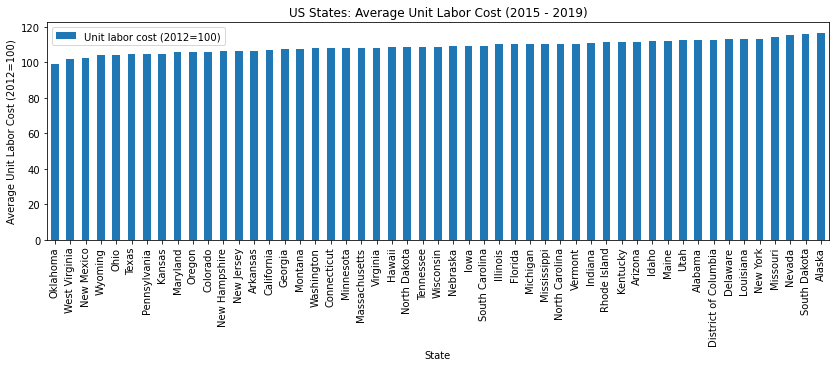

In [28]:
# Group by state and get the averages; then plot for comparison
avg_unitcost = clean_data.groupby('State').mean()
avg_unitcost_sorted = avg_unitcost.sort_values(['Unit labor cost (2012=100)'])
avg_unitcost_sorted.plot(kind="bar", y=['Unit labor cost (2012=100)'], figsize=(14,4))

plt.title('US States: Average Unit Labor Cost (2015 - 2019)')
plt.xlabel('State')
plt.ylabel('Average Unit Labor Cost (2012=100)')
plt.savefig("Images/5_Lowest_UnitLabor_Cost.png")


# Print out the lowest 5 for visibility
lowest_comps = avg_unitcost_sorted.iloc[0:5,:]
print("LOWEST 5 STATES UNIT LABOR COST\n-----------------------")
for index,row in lowest_comps.iterrows():
    print(f"{index}: ${round(row['Unit labor cost (2012=100)'],2)}")

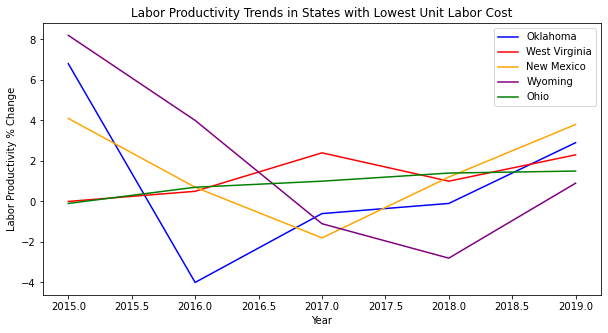

In [29]:
lowest_cost_list = []
for index, row in lowest_comps.iterrows():
    lowest_cost_list.append(index)

lowest_cost_list
prod_df = clean_data.loc[clean_data['State'].isin(lowest_cost_list),:]
years = prod_df['Year'].unique()
plt.figure(figsize=(10,5))
state1, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_cost_list[0],'Labor productivity (percent change)'],
                  color = 'blue', label = lowest_cost_list[0])
state2, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_cost_list[1],'Labor productivity (percent change)'],
                  color = 'red', label = lowest_cost_list[1])
state3, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_cost_list[2],'Labor productivity (percent change)'],
                  color = 'orange', label = lowest_cost_list[2])
state4, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_cost_list[3],'Labor productivity (percent change)'],
                  color = 'purple', label = lowest_cost_list[3])
state5, = plt.plot(years, prod_df.loc[prod_df['State'] == lowest_cost_list[4],'Labor productivity (percent change)'],
                  color = 'green', label = lowest_cost_list[4])


plt.legend(handles=[state1, state2, state3, state4, state5], loc='best')
plt.title('Labor Productivity Trends in States with Lowest Unit Labor Cost')
plt.xlabel('Year')
plt.ylabel('Labor Productivity % Change')
plt.savefig("Images/5_Lowest_UnitLabor_Cost_Labor_Prod.png")
plt.show()

HIGHEST 5 STATES OUTPUT PER EMPLOYEE
-----------------------
Alaska: 92.92
Delaware: 95.4
Nevada: 95.96
Louisiana: 96.64
Mississippi: 97.28


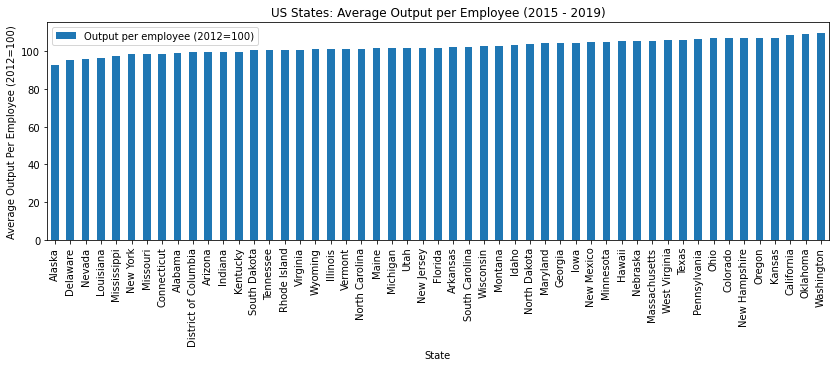

In [30]:
# Group by state and get the averages; then plot for comparison
avg_outputper = clean_data.groupby('State').mean()
avg_outputper_sorted = avg_outputper.sort_values(['Output per employee (2012=100)'])
avg_outputper_sorted.plot(kind="bar", y=['Output per employee (2012=100)'], figsize=(14,4))

plt.title('US States: Average Output per Employee (2015 - 2019)')
plt.xlabel('State')
plt.ylabel('Average Output Per Employee (2012=100)')
plt.savefig("Images/5_Highest_Employee_Output.png")

highest_output = avg_outputper_sorted.iloc[0:5,:]
print("HIGHEST 5 STATES OUTPUT PER EMPLOYEE\n-----------------------")
for index,row in highest_output.iterrows():
    print(f"{index}: {round(row['Output per employee (2012=100)'],2)}")

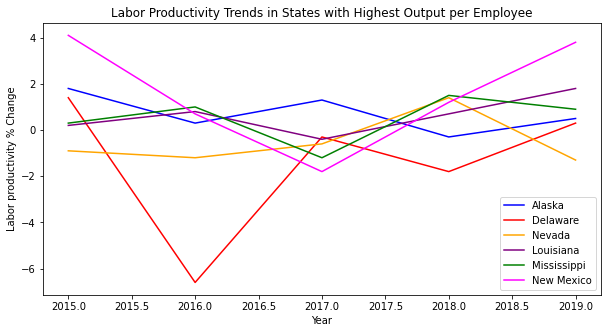

In [31]:
high_output_list = []
for index, row in highest_output.iterrows():
    high_output_list.append(index)

high_output_list.append("New Mexico")    

high_output_list
prod_df = clean_data.loc[clean_data['State'].isin(high_output_list),:]
years = prod_df['Year'].unique()
plt.figure(figsize=(10,5))
state1, = plt.plot(years, prod_df.loc[prod_df['State'] == high_output_list[0],'Labor productivity (percent change)'],
                  color = 'blue', label = high_output_list[0])
state2, = plt.plot(years, prod_df.loc[prod_df['State'] == high_output_list[1],'Labor productivity (percent change)'],
                  color = 'red', label = high_output_list[1])
state3, = plt.plot(years, prod_df.loc[prod_df['State'] == high_output_list[2],'Labor productivity (percent change)'],
                  color = 'orange', label = high_output_list[2])
state4, = plt.plot(years, prod_df.loc[prod_df['State'] == high_output_list[3],'Labor productivity (percent change)'],
                  color = 'purple', label = high_output_list[3])
state5, = plt.plot(years, prod_df.loc[prod_df['State'] == high_output_list[4],'Labor productivity (percent change)'],
                  color = 'green', label = high_output_list[4])
state6, = plt.plot(years, prod_df.loc[prod_df['State'] == 'New Mexico','Labor productivity (percent change)'],
                  color = 'magenta', label = 'New Mexico')



plt.legend(handles=[state1, state2, state3, state4, state5, state6], loc='best')
plt.title('Labor Productivity Trends in States with Highest Output per Employee')
plt.xlabel('Year')
plt.ylabel('Labor productivity % Change')
plt.savefig("Images/5_Highest_Output_States.png")
plt.show()